<a href="https://colab.research.google.com/github/dinesh-2k3/APSSDC-KEY-LOGGER-FINAL-PROJECT/blob/main/market_maven_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate Random Data

# Number of rows (transactions)
num_rows = 1000

# Generate dates between 2022-01-01 and 2023-12-31
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_rows)]

# Generate times between 00:00 and 23:59
times = [str(random.randint(0, 23)).zfill(2) + ":" + str(random.randint(0, 59)).zfill(2) for _ in range(num_rows)]

# Random categorical data
product_lines = ['Supermarket', 'Cosmetics', 'Electronics', 'Home and Lifestyle', 'Sports and Travel']
customer_types = ['Member', 'Normal']
genders = ['Male', 'Female']
payments = ['Cash', 'Credit card', 'Ewallet']

# Random numerical data
quantities = np.random.randint(1, 10, size=num_rows)  # Random quantities between 1 and 10
unit_prices = np.random.uniform(5, 500, size=num_rows)  # Random unit price between 5 and 500
ratings = np.random.uniform(1, 5, size=num_rows)  # Random ratings between 1 and 5

# Calculate Total and Gross Income
totals = quantities * unit_prices  # Total sales (Quantity * Unit price)
gross_incomes = totals - (totals * 0.05)  # Assuming 5% gross income (excluding tax)

# Create the DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'Time': times,
    'Product line': [random.choice(product_lines) for _ in range(num_rows)],
    'Customer type': [random.choice(customer_types) for _ in range(num_rows)],
    'Gender': [random.choice(genders) for _ in range(num_rows)],
    'Payment': [random.choice(payments) for _ in range(num_rows)],
    'Quantity': quantities,
    'Unit price': unit_prices,
    'Total': totals,
    'gross income': gross_incomes,
    'Rating': ratings
})

# Save to Excel
df.to_excel('supermarket_dataset.xlsx', index=False)

# Print the first few rows to verify the data
print(df.head())

        Date   Time       Product line Customer type  Gender  Payment  \
0 2023-10-17  17:14        Supermarket        Member    Male     Cash   
1 2022-04-25  20:09        Electronics        Normal  Female  Ewallet   
2 2022-01-26  08:52        Electronics        Member    Male  Ewallet   
3 2022-10-09  04:04  Sports and Travel        Normal    Male     Cash   
4 2022-09-08  01:10          Cosmetics        Normal  Female     Cash   

   Quantity  Unit price        Total  gross income    Rating  
0         7  119.382024   835.674170    793.890462  3.755541  
1         4  337.586908  1350.347632   1282.830251  4.493292  
2         8   14.756716   118.053730    112.151043  3.545165  
3         5   56.533748   282.668740    268.535303  4.044486  
4         7  400.958462  2806.709236   2666.373774  1.640287  


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 1. Load the data:
df = pd.read_excel('supermarket_dataset.xlsx')

# 2. Select features (X) and target (y):
# Assuming 'Total' is the target variable
X = df[['Quantity', 'Unit price', 'Rating']]  # Features
y = df['Total']  # Target

# 3. Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the model:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Now the model is trained and ready for predictions!

RandomForestRegressor(random_state=42)

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Step 1: Load Data
# Adjust the delimiter based on the file structure
df = pd.read_excel('supermarket_dataset.xlsx')

# Step 2: Clean Column Names
df.columns = df.columns.str.replace(r'[;]', '', regex=True).str.strip()

# Step 3: Convert Date and Create DateTime Column
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Time'].astype(str)  # Convert Time to string format
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df.drop(columns=['Date', 'Time'], inplace=True)

# Step 4: Handle Missing Values
df.fillna(0, inplace=True)

# Step 5: Encode Categorical Variables (Exclude 'Product line', 'City', 'Branch')
label_encoders = {}
categorical_columns = ['Customer type', 'Gender', 'Payment']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 6: One-Hot Encoding for 'Product line', 'City', 'Branch'
df = pd.get_dummies(df, columns=['Product line'], drop_first=True)

# Step 7: Feature Engineering: Date-Time Features
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Hour'] = df['DateTime'].dt.hour

# Step 8: Add Additional Columns
df['RevenuePerUnit'] = df['Unit price'] * df['Quantity']
df['TotalTaxAmount'] = df['Total'] * 0.05
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Drop unnecessary columns
df.drop(columns=['DateTime'], inplace=True)

# Step 9: Log Transformation
df['LogQuantity'] = np.log1p(df['Quantity'])
df['LogTotal'] = np.log1p(df['Total'])
df['LogGrossIncome'] = np.log1p(df['gross income'])

# Step 10: Interaction Feature: Quantity * Unit Price
df['QuantityUnitPrice'] = df['Quantity'] * df['Unit price']

# Step 11: Outlier Treatment for 'Total'
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1
before_rows = len(df)
df = df[(df['Total'] >= Q1 - 1.5 * IQR) & (df['Total'] <= Q3 + 1.5 * IQR)]
after_rows = len(df)
print(f"Rows before outlier treatment: {before_rows}, after: {after_rows}")

# Step 12: Define Numerical Features
numerical_features = [
    'Unit price', 'Quantity', 'gross income', 'Rating', 'RevenuePerUnit',
    'TotalTaxAmount', 'LogQuantity', 'LogTotal', 'LogGrossIncome',
    'QuantityUnitPrice', 'IsWeekend', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour'
]

# Ensure numerical features are numeric
df[numerical_features] = df[numerical_features].apply(pd.to_numeric, errors='coerce')

# Step 13: Split Data into Features and Target
X = df.drop(columns=['Total'])  # Features
y = df['Total']  # Target

# Drop any non-numeric columns from X
non_numeric_columns = X.select_dtypes(include=['object']).columns
if len(non_numeric_columns) > 0:
    print(f"Non-numeric columns found: {non_numeric_columns}")
    X = X.drop(columns=non_numeric_columns)

# Step 14: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 15: Scale the Data (Standardize)
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Step 16: Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 17: Make Predictions
y_pred = rf_regressor.predict(X_test)

# Step 18: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Step 19: Save the Trained Model
joblib.dump(rf_regressor, 'random_forest_regressor.pkl')
print("Model saved as 'random_forest_regressor.pkl'")

# Step 20: Example: Load and Use the Saved Model
loaded_model = joblib.load('random_forest_regressor.pkl')
new_data = X_test.iloc[0:1]  # Example: Use the first row of the test set
new_prediction = loaded_model.predict(new_data)
print(f"Prediction for new data: {new_prediction}")


Rows before outlier treatment: 1000, after: 993
Mean Squared Error (MSE): 206.1352716251095
R-squared (R²): 0.9998239691973028
Model saved as 'random_forest_regressor.pkl'
Prediction for new data: [1557.66466261]


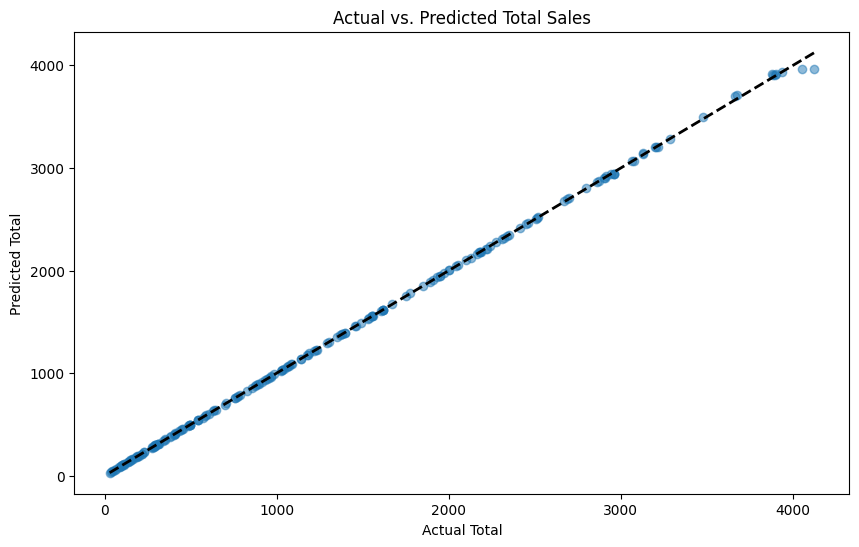

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha for transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Total")
plt.ylabel("Predicted Total")
plt.title("Actual vs. Predicted Total Sales")
plt.show()

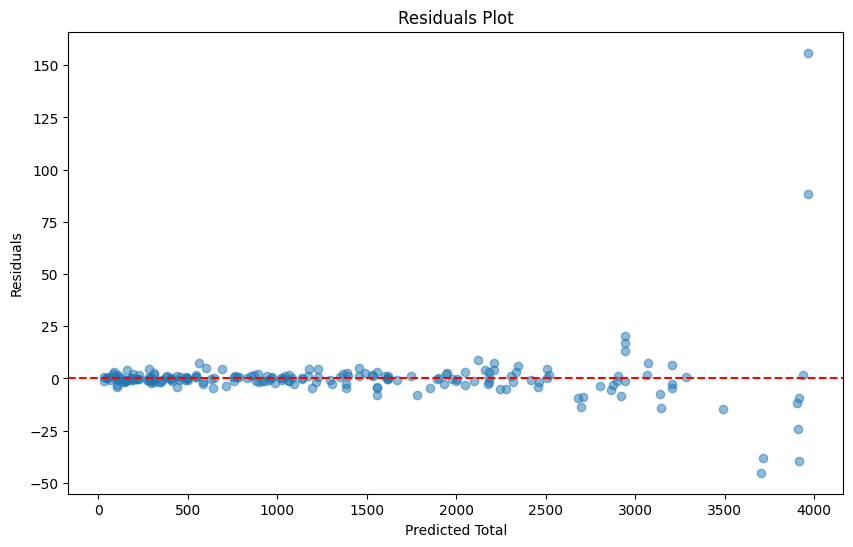

In [12]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel("Predicted Total")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

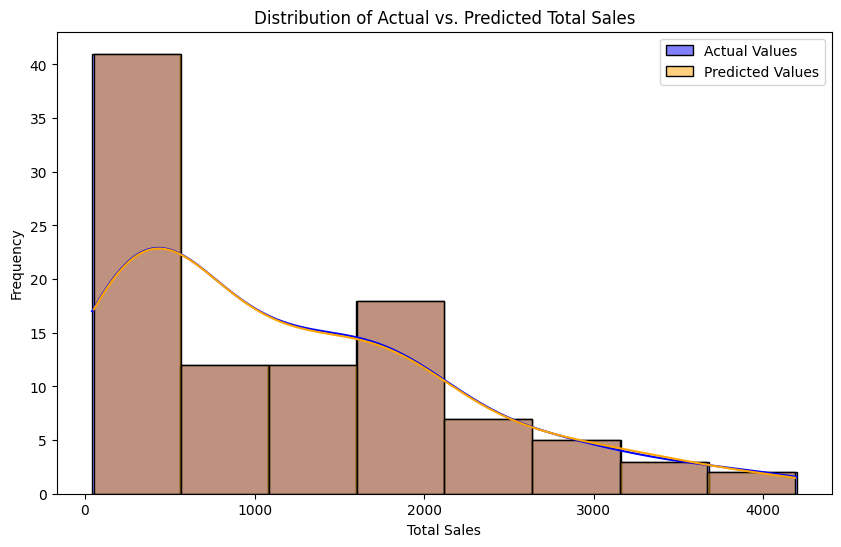

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test, label='Actual Values', color='blue', kde=True)
sns.histplot(y_pred, label='Predicted Values', color='orange', kde=True)
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Total Sales')
plt.legend()
plt.show()

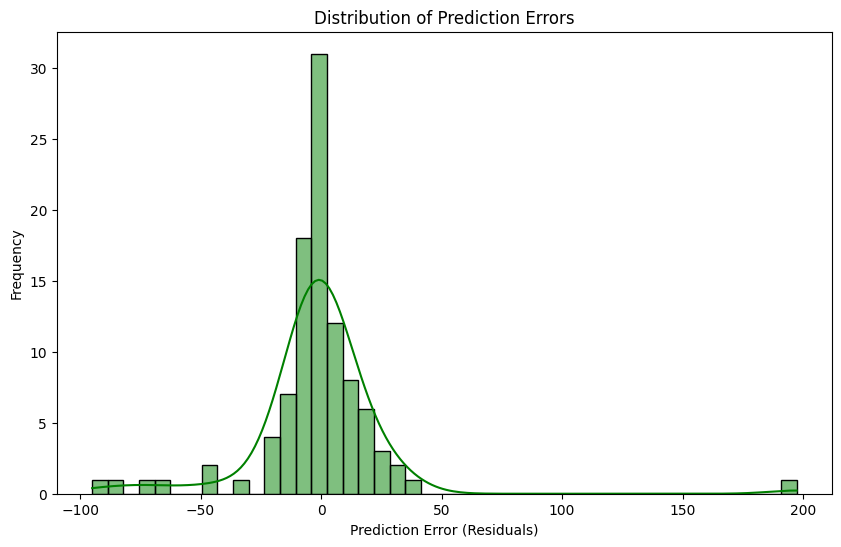

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuals, color='green', kde=True)
plt.xlabel('Prediction Error (Residuals)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

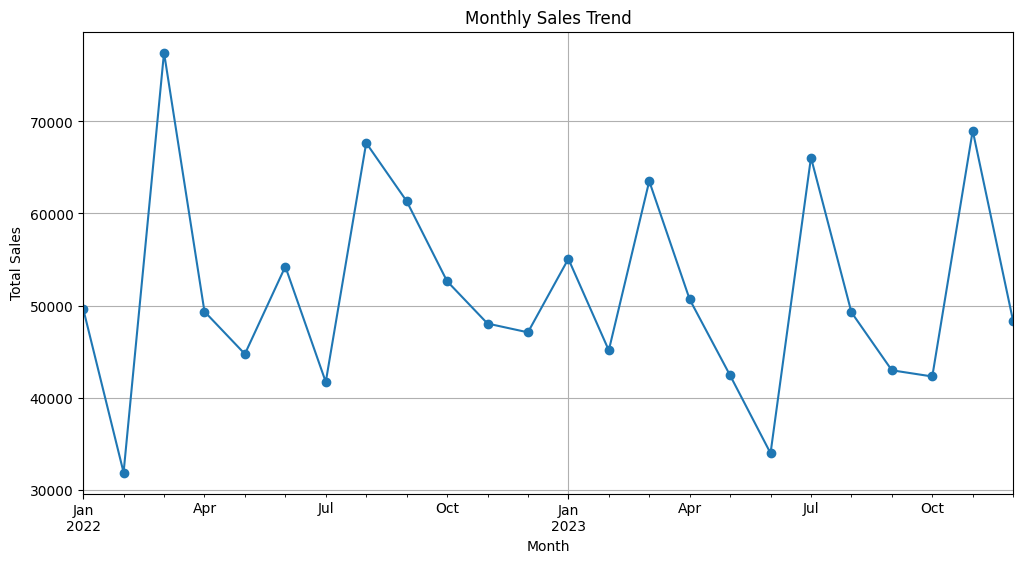

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Date' is a column in your DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if necessary
sales_trend = df.groupby(df['Date'].dt.to_period('M'))['Total'].sum()

plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

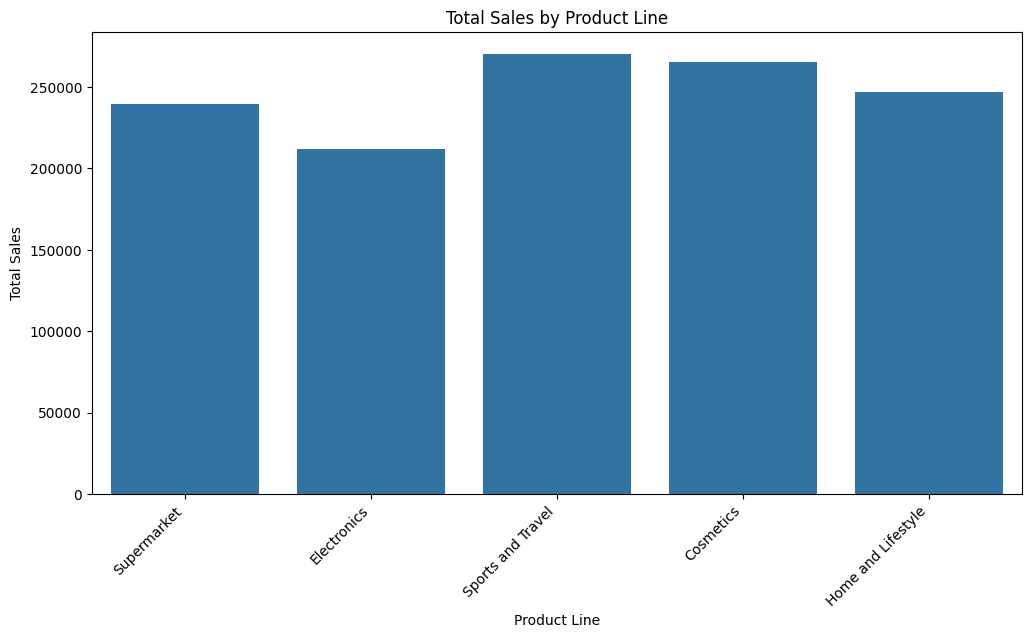

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total', data=df, estimator=sum, errorbar=None)
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

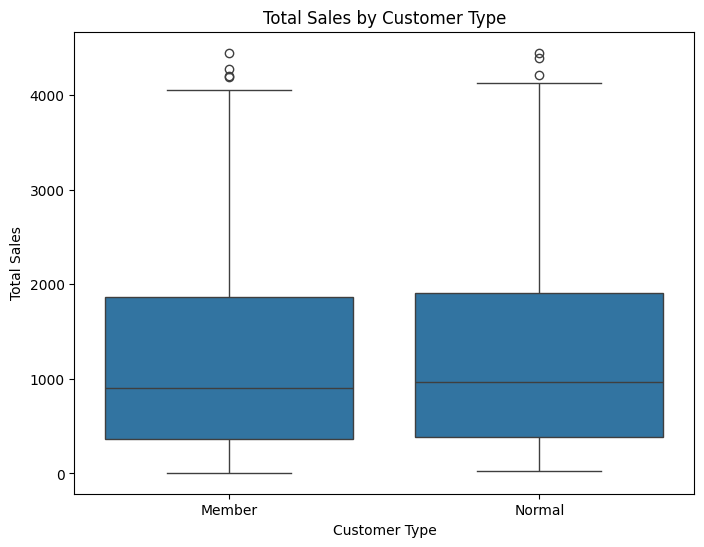

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer type', y='Total', data=df)
plt.title('Total Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

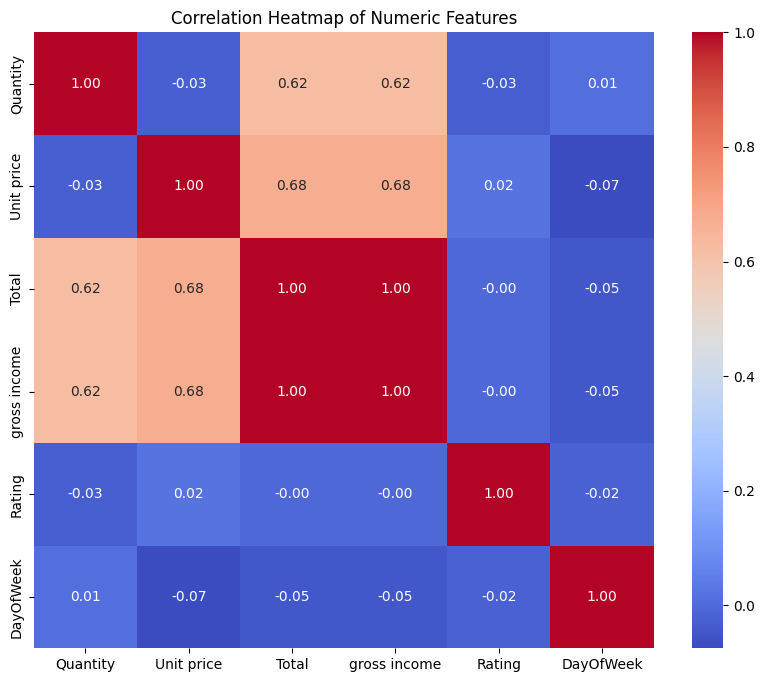

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

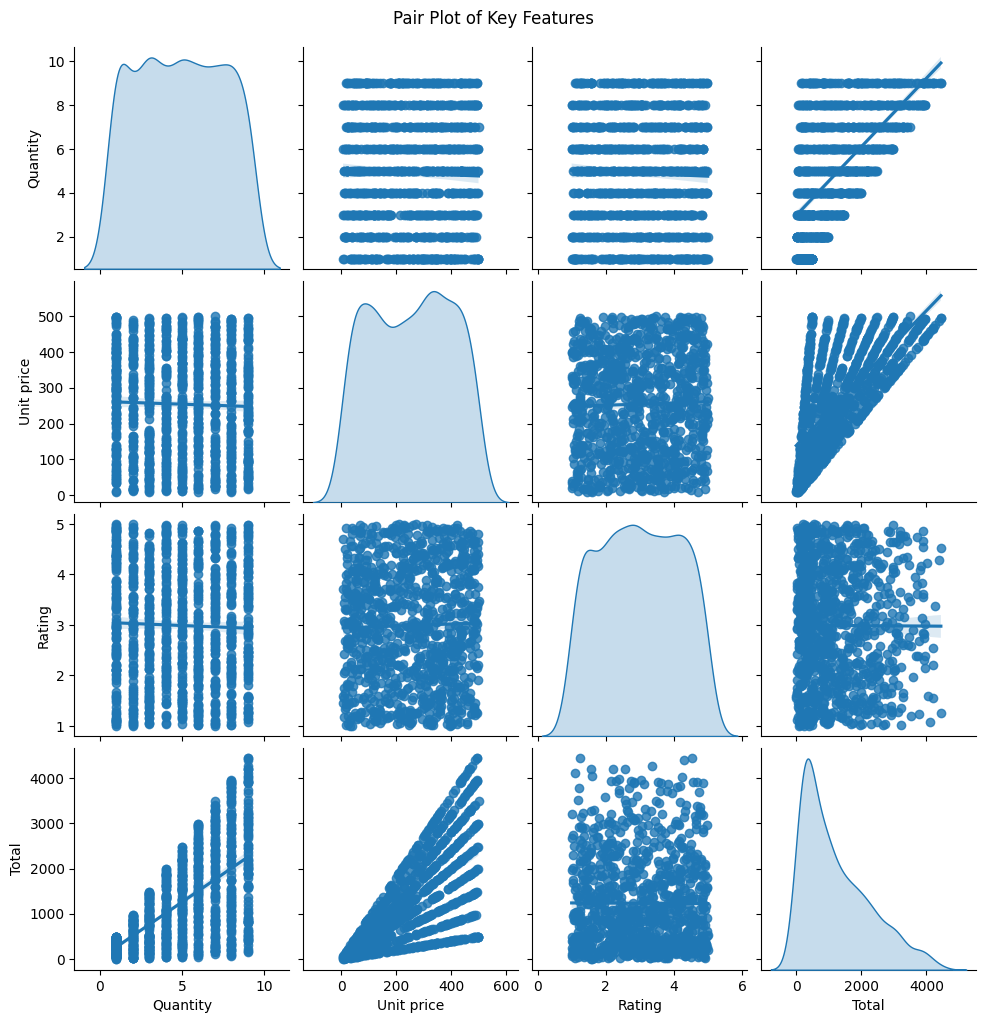

In [ ]:
import seaborn as sns

sns.pairplot(df[['Quantity', 'Unit price', 'Rating', 'Total']], kind='reg', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

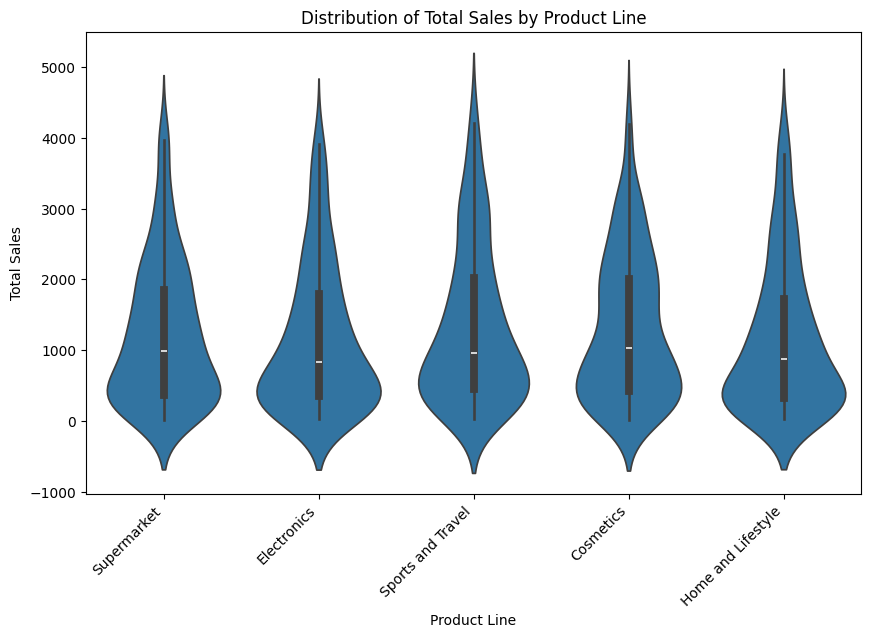

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='Product line', y='Total', data=df)
plt.title('Distribution of Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

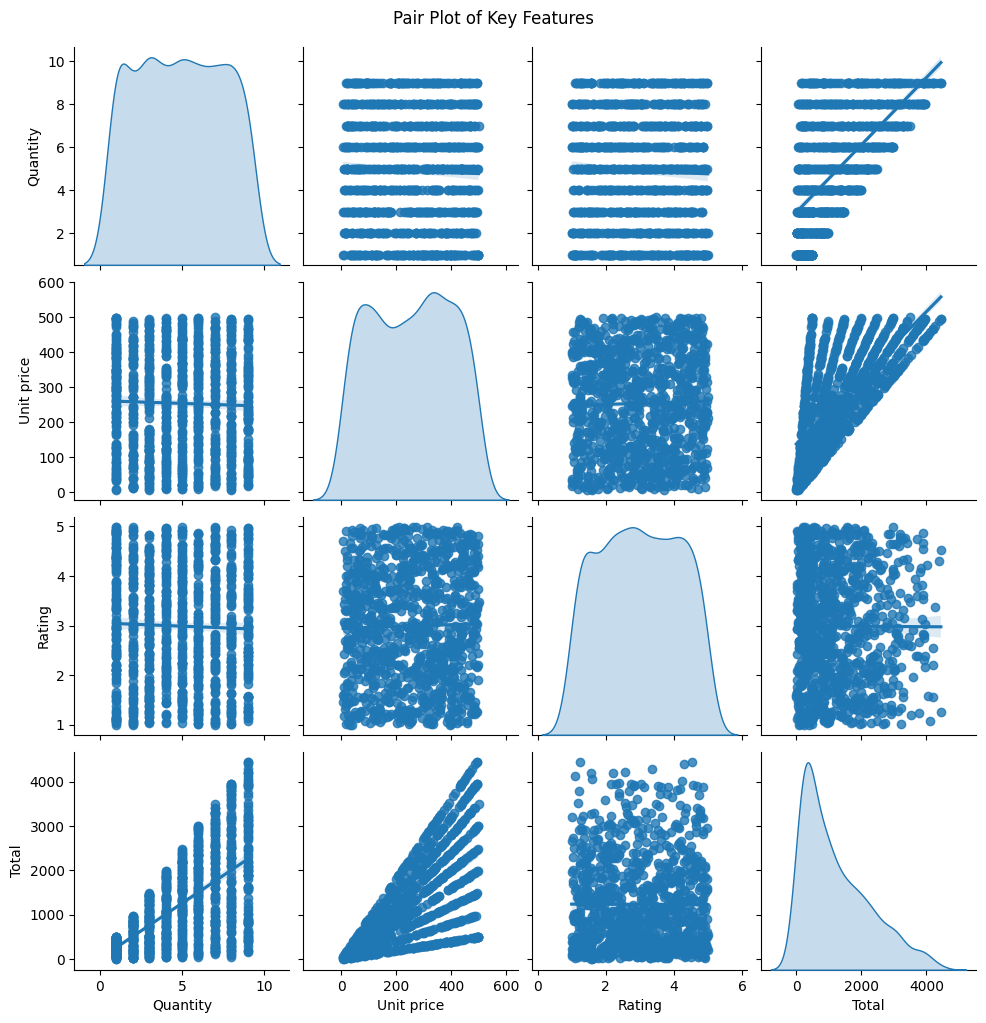

In [ ]:
import seaborn as sns

sns.pairplot(df[['Quantity', 'Unit price', 'Rating', 'Total']], kind='reg', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

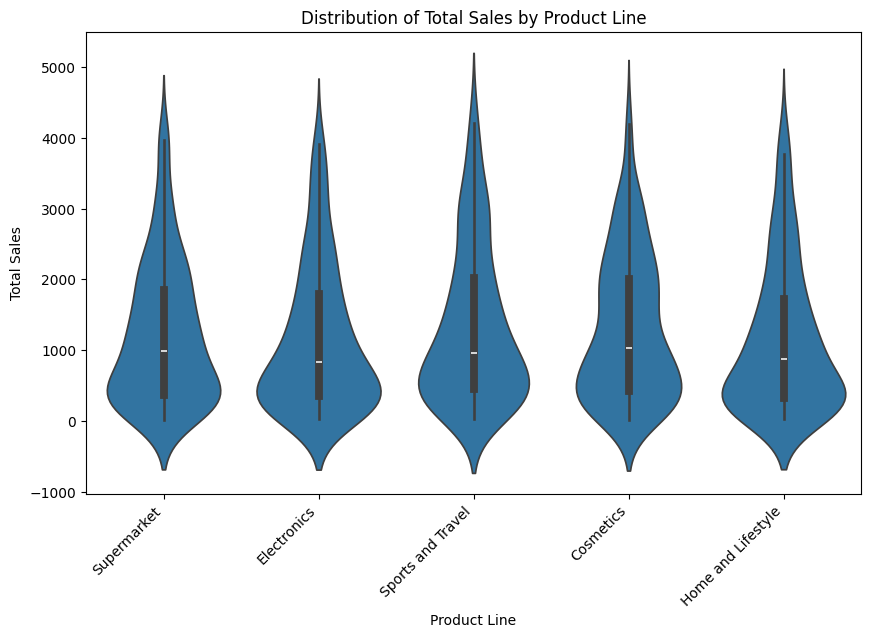

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='Product line', y='Total', data=df)
plt.title('Distribution of Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='Unit price', y='Total', color='Product line',
                 hover_data=['Quantity', 'Rating'], trendline='ols')
fig.update_layout(title='Total Sales vs. Unit Price by Product Line')
fig.show()